<h1 align=center style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Mapping
</font>
</h1>

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the Chinese housing dataset, the geographical coordinates of each house are specified. Using the <code>scatter</code> function from the Matplotlib library, we can plot the houses based on their location and then analyze the map. A lot of useful information can be extracted from these maps. The density of different areas, features of houses in each area (having an elevator, area, price, etc.) are some of the information that can be obtained from this plot. In this step of the project, we will learn how to draw such plots.
</font> 
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
First, we will read the file <code>housing_extended.csv</code>, which was obtained in the previous step of the project.
</font>
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended.head()


Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
3  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   
4  116.466280  39.991363  2016-07-22   861.0       275.6   53.00           1   

   drawingRoom  kitchen  bathRoom  floor  constructionTime  \
0            1        1         1     26              2005   
1            2        1         2     22              2004   
2            1        1         1     21              2008   
3            1        1         1      6              1960   
4            0        1         1      8              2005   

  renovationCondition         buildingStructure  ladderRatio      elevator  \
0          Simplicity  steel-concrete composite        0.217  has elevator   
1           hardcover  steel-concrete composite        0.667  has elevator   
2               other  steel-concrete composite        0.273  has elevator   
3               rough                     mixed        0.333   no elevator   
4          Simplicity  steel-concrete composite        0.333  has elevator   

       subway  district  distanceToCapital  pricePerSquare  
0  has subway         7          14.074996     3167.938931  
1   no subway         7           4.701224     4343.556428  
2   no subway         6          19.293041     2220.149254  
3  has subway         1           2.683335     4839.506173  
4   no subway         7          10.914652     5200.000000

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In this step of the project, we will use only one percent of the rows to create the plots. This is to prevent the notebook and output files from becoming too large. The dataframe we will use is called <code>housing_sample</code>, which is created by selecting one row out of every hundred rows from the <code>housing_extended</code> dataframe. In the next step of the project, which is also the final step, we will use the original <code>housing_extended</code> dataframe.
</font>
</p>


In [2]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
By having the longitude and latitude of the houses, we can use a scatter plot to visualize the houses on a plane and see their positions relative to each other. The scale of the horizontal and vertical axes of the plot should be equal. To equalize the scales of the horizontal and vertical axes, we use the method <code>ax.axis('equal')</code>.
</font>
</p>


Text(0.5, 1.0, 'scatter plot')

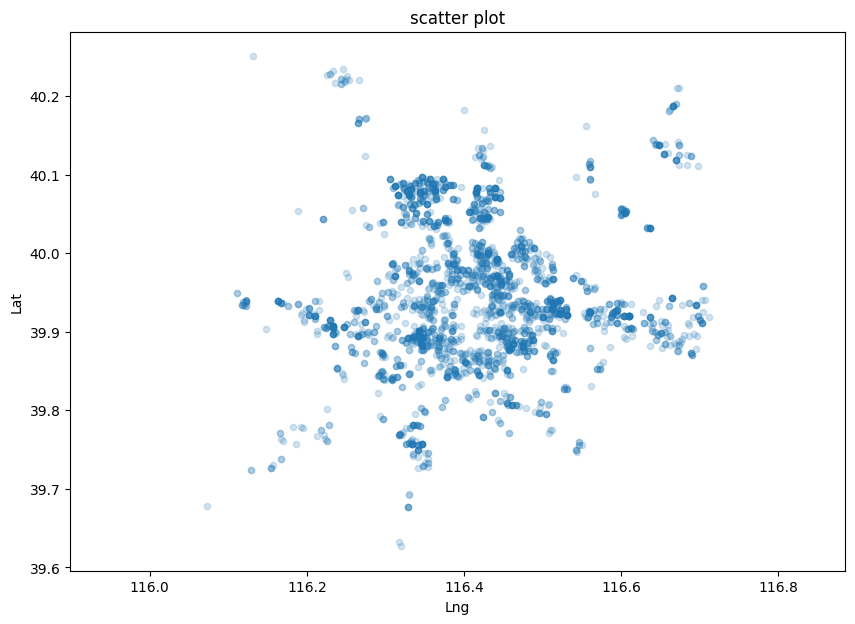

In [3]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
You can see that most of the houses are clustered at a point, which is the center of the capital of China.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Determining the Color of Points
</font>
</h2>

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the <code>scatter</code> plot, by setting values for the <code>c</code> and <code>s</code> variables, you can specify the color and size of the points, respectively, creating a chart with more valuable information. Unlike the <code>plot</code> function, where you could only specify one color for all points, in the <code>scatter</code> function, this is done with a set of points and a color map. This means there is a color or number for each point, which is then converted to a color using the color map.
<br>
We intend to use the <b>price per square meter</b> to determine the color of the points. This means the price of each house is converted to a color for that point on the map using a color map. Due to the use of the <code>jet</code> color map, the higher the price, the warmer the color.
</font>
</p>


(116.04057284999999, 116.74327815, 39.5958495, 40.281820499999995)

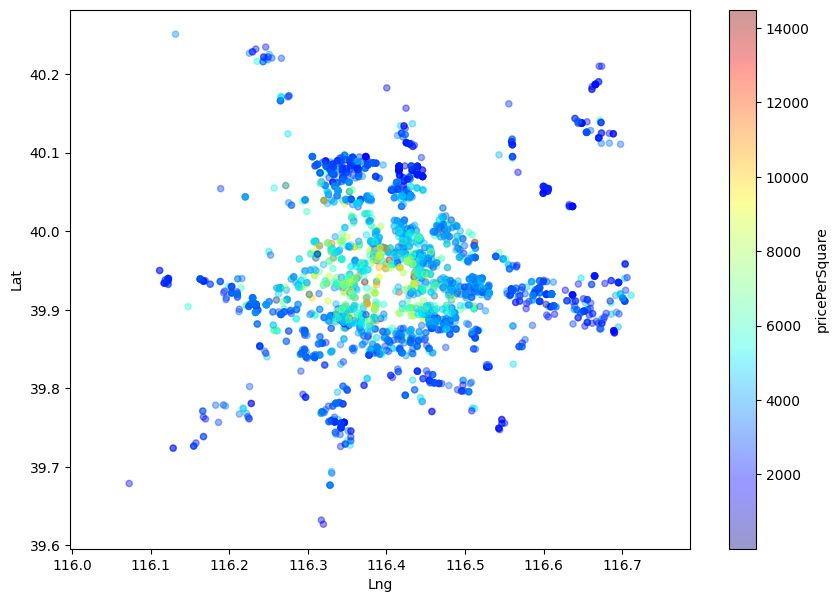

In [4]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal')

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
The chart above shows that the most expensive houses (based on price per square meter) are located near the city center, and how prices decrease as you move away from the center.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part One
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Use the axis created in the previous code and add the city center to the scatter plot using the <code>annotate</code> method. Note that the chart is ready and you just need to add the annotation.

<ul>
  <li>
      The location of the text should be at the point <code>(116.6, 39.65)</code>.
</li>
  <li>
      The location of the arrow end should be at the point <code>(116.40, 39.90)</code>.
</li>
  <li>
Set the display text to <code>center of Beijing</code>.
</li>
  <li>
Set the connection type to <code>connectionstyle</code> (the object is already created).
</li>
  <li>
Set the arrow type to <code>fancy</code>.
</li>
</ul>
</font>
</p>


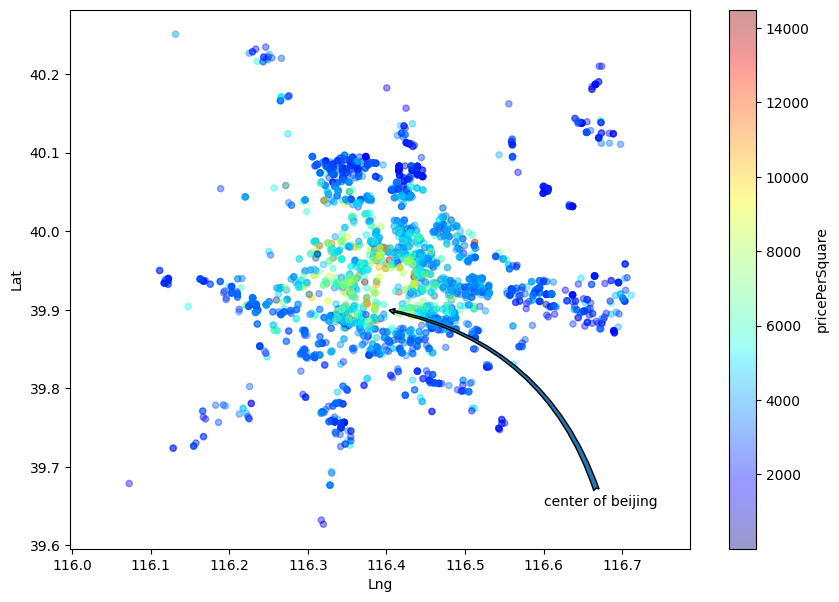

In [5]:
from matplotlib.patches import ConnectionStyle

# # Assuming fig2, ax2, and housing_sample are already defined as in your code
# fig2, ax2 = plt.subplots()
# fig2.set_size_inches(10, 7)

# housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
#                     c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

# ax2.axis('equal')

# Create the connection style
connectionstyle = ConnectionStyle("Arc3", rad=0.3)

# Add the annotation to the plot
ax2.annotate('center of beijing',
             xy=(116.40, 39.90),  # Arrow pointing to this location
             xytext=(116.6, 39.65),  # Location of the text
             arrowprops=dict(
                             connectionstyle=connectionstyle,
                             arrowstyle='fancy'));

# Display the plot
fig2


<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Until the <code>clear</code> method is called, the chart is not cleared, and new shapes are drawn on top of the old ones. This means that each time you run the code above, a new <code>annotation</code> is drawn on the previous one. To prevent this, after writing the correct code, we will re-run the cell that creates the figure and the cell that adds the <code>annotation</code>, and check that there is only one <code>text</code> object in the cell below.
</font>
</p>


In [6]:
ax2.texts

<Axes.ArtistList of 1 texts>

<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Determining the Size of Points
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Now we will use the <code>s</code> variable to specify the size of the points. We can use the distance of each house from the city center as a criterion for the size of the points. See the example below:
</font>
</p>


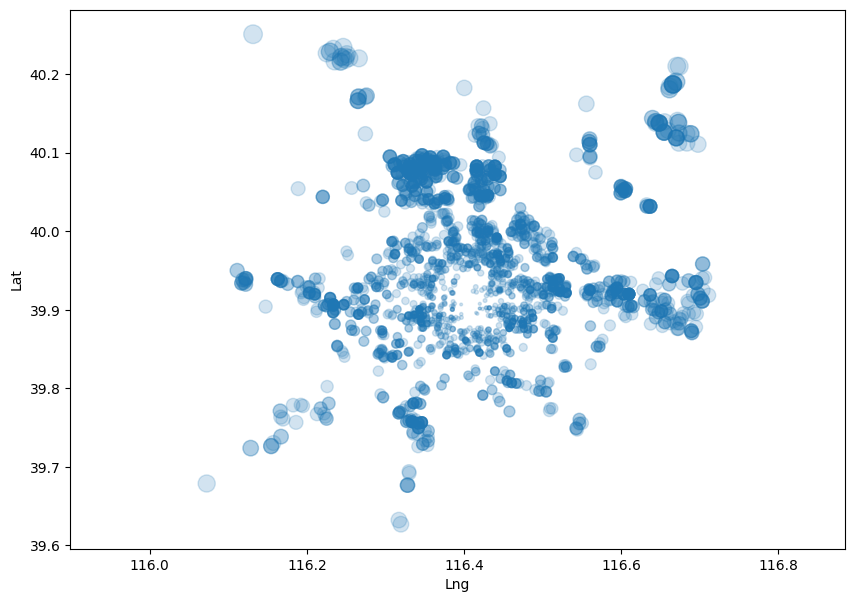

In [7]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2,\
    s = housing_sample['distanceToCapital'] * 4)

ax3.axis('equal');

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the above figure, the color of all points is the same, but their size is determined based on the distance of each house from the city center. The larger this value, the bigger the points appear on the chart. The factor of 4 is used to quadruple the size of all points. Choosing the factor requires a bit of trial and error.
</font>
</p>


<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We can place an image of this region of the world behind the plotted points to get a more realistic view of the houses' locations. Using the range of the horizontal and vertical axes of the chart, we have obtained the desired area from Google Maps, which is stored in the image <code>map1</code>. We will use the <code>imshow</code> method to place this image behind the chart:
</font>
</p>


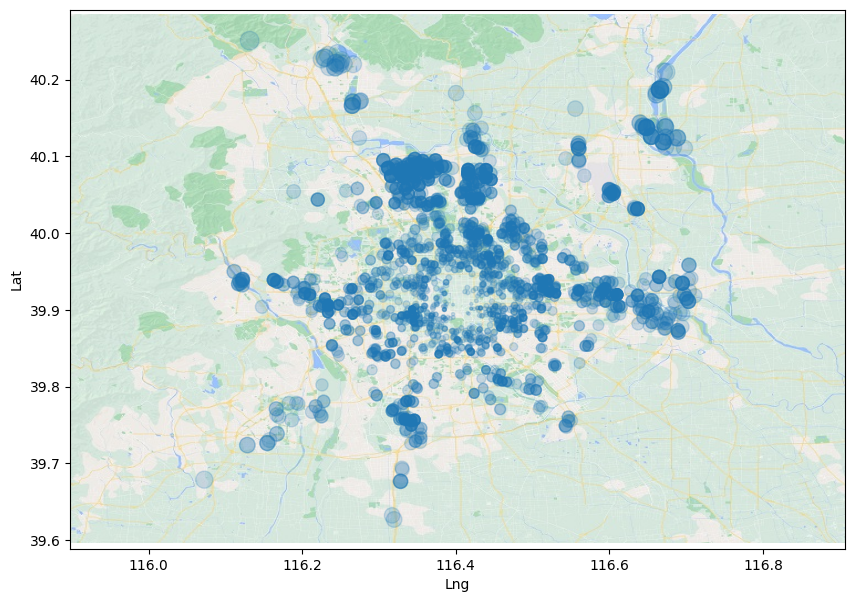

In [8]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig3

<h2 dir=ltr align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Explanation of the <code>extent</code> Parameter
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
When using the <code>imshow</code> method, we need to be mindful of where the image is placed. By default, the image is drawn at the coordinates <code>(0,0)</code> and stretched to the size of the image in pixels. If you look at the previous chart, you'll see that the houses are plotted approximately within the range of <code>115</code> to <code>117</code> on the horizontal axis and <code>39.6</code> to <code>40.2</code> on the vertical axis.
<br>
First, we obtained the exact range of the previous chart using the <code>get_xlim</code> and <code>get_ylim</code> methods. Then, we used the <code>extent</code> parameter to align the image exactly on the previous chart.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Two
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We will plot the previous chart at dimensions of <code>12.5</code> by <code>7</code> inches, and this time we will use the district column (<code>district</code>) to color the points. We will use the square footage column (<code>square</code>) to determine the size of the points. Note that due to the large numbers in the square footage column, we will divide them by 20. We will use the color map <code>nipy_spectral</code> to convert numbers to colors. We will also set the <code>alpha</code> value to <code>0.6</code>.
<br>
<br>



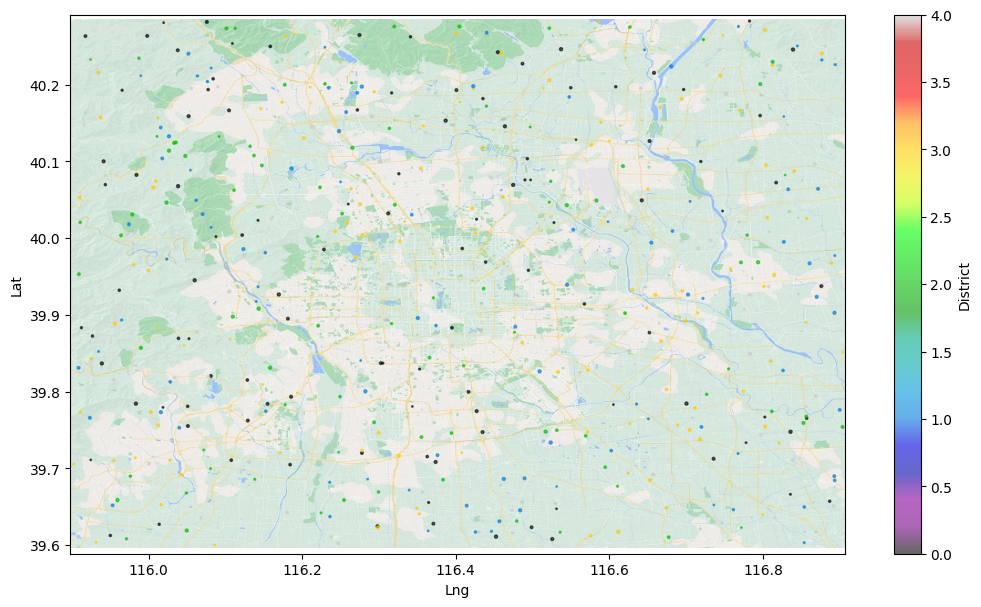

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

# Load the map image
new_map_img_path = 'map1.jpg'
new_map_img = mpimg.imread(new_map_img_path)

# Define the districts and corresponding coordinates
# Assuming you have this DataFrame `housing_sample` with 'Lng', 'Lat', 'district', and 'square' columns
# For demonstration, let's create some sample data for the plot
np.random.seed(42)
num_points = 500
districts = np.random.randint(0, 5, num_points)
lng = np.random.uniform(115.89777890444654, 116.90711309555346, num_points)
lat = np.random.uniform(39.5957436, 40.2840444, num_points)
square = np.random.uniform(20, 100, num_points)

housing_sample = pd.DataFrame({
    'Lng': lng,
    'Lat': lat,
    'district': districts,
    'square': square
})

# Normalize the point sizes
sizes = housing_sample['square'] / 20

# Create the plot
fig, ax = plt.subplots(figsize=(12.5, 7))
ax.imshow(new_map_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])

# Plot the points with 'nipy_spectral' colormap
sc = ax.scatter(housing_sample['Lng'], housing_sample['Lat'], c=housing_sample['district'],
                s=sizes, cmap='nipy_spectral', alpha=0.6, marker='o')

# Add color bar
cb = plt.colorbar(sc, ax=ax)
cb.set_label('District')

# Set labels and ensure proper scaling
ax.set_xlabel('Lng')
ax.set_ylabel('Lat')
ax.axis('equal')
ax.grid(False)

# Display the plot
plt.show()


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Three
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Now we will redraw the chart created in Part Two with the following changes:
<ul dir=ltr>
  <li>
We will plot only houses that are between 10 and 30 kilometers from the center (10 and 30 themselves are not included).
</li>
  <li>
Instead of the <code>map1</code> file, we will use the <code>map2</code> file as the background image.
</li>
</ul>
</font>
</p>


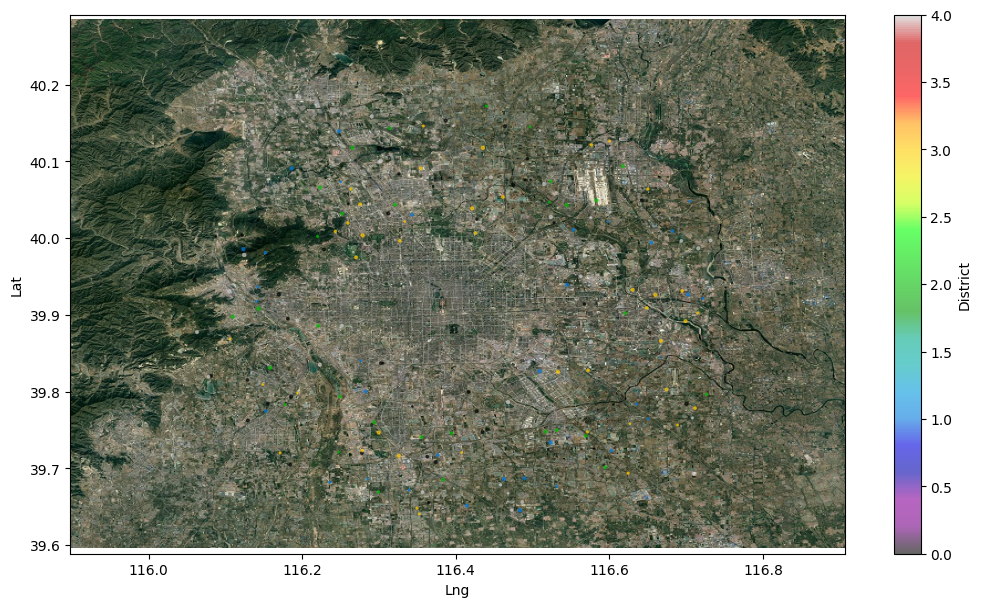

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

# Define the center point
center_lng, center_lat = 116.407395, 39.904211  # Example: Beijing center

# Load the new map image
new_map_img_path = 'map2.jpg'
new_map_img = mpimg.imread(new_map_img_path)

# Define a function to calculate distance from the center (in kilometers)
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate distances from the center
housing_sample['distance'] = haversine(housing_sample['Lng'], housing_sample['Lat'], center_lng, center_lat)

# Filter houses that are between 10 and 30 kilometers from the center
filtered_housing_sample = housing_sample[(housing_sample['distance'] > 10) & (housing_sample['distance'] < 30)]

# Normalize the point sizes
sizes = filtered_housing_sample['square'] / 20

# Create the plot
fig5, ax5 = plt.subplots(figsize=(12.5, 7))
ax5.imshow(new_map_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])

# Plot the points with 'nipy_spectral' colormap
sc = ax5.scatter(filtered_housing_sample['Lng'], filtered_housing_sample['Lat'], c=filtered_housing_sample['district'],
                 s=sizes, cmap='nipy_spectral', alpha=0.6, marker='o')

# Add color bar
cb = plt.colorbar(sc, ax=ax5)
cb.set_label('District')

# Set labels and ensure proper scaling
ax5.set_xlabel('Lng')
ax5.set_ylabel('Lat')
ax5.axis('equal')
ax5.grid(False)

# Display the plot
plt.show()


<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In this step, we did not make any changes to the dataframe, and in the next step, we will use the <code>housing_extended.csv</code> file again.
</font>
</p>
